In [1]:
from math import pi, sqrt

from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
pi

3.141592653589793

In [4]:
sqrt(5)

2.23606797749979

In [5]:
sqrt(4)

2.0

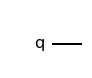

In [6]:
qc = QuantumCircuit(1)
qc.draw(output='mpl')

In [17]:
sim = Aer.get_backend('aer_simulator')

In [8]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([1.+0.j, 0.+0.j])

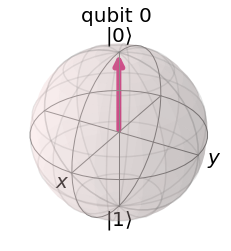

In [9]:
plot_bloch_multivector(state)

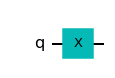

In [10]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

In [11]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([0.+0.j, 1.+0.j])

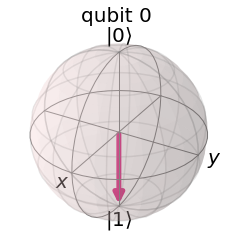

In [12]:
plot_bloch_multivector(state)

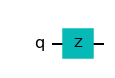

In [14]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw(output='mpl')

In [15]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw(output='mpl')
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([ 1.+0.j, -0.+0.j])

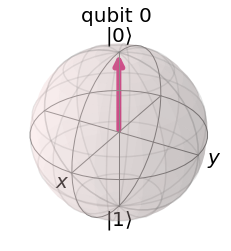

In [16]:
plot_bloch_multivector(state)

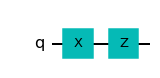

In [17]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.draw(output='mpl')

In [18]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([ 0.+0.j, -1.+0.j])

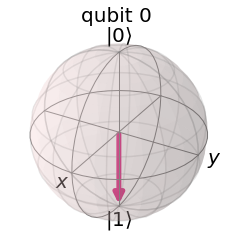

In [19]:
plot_bloch_multivector(state)

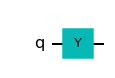

In [23]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw(output='mpl')

In [24]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([0.-0.j, 0.+1.j])

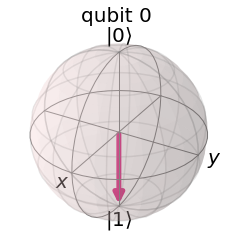

In [25]:
plot_bloch_multivector(state)

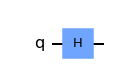

In [26]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

In [27]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([0.70710678+0.j, 0.70710678+0.j])

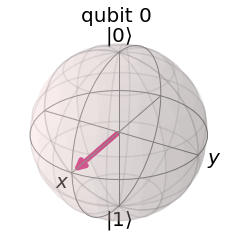

In [28]:
plot_bloch_multivector(state)

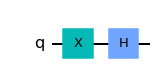

In [37]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw(output='mpl')

In [38]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state

array([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j])

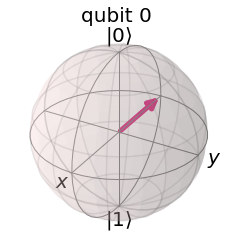

In [35]:
plot_bloch_multivector(state)

In [36]:
state

array([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j])

In [5]:
import numpy as np

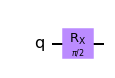

In [6]:
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)
qc.draw(output='mpl')

In [7]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

AttributeError: 'QuantumCircuit' object has no attribute 'save_statevector'

In [8]:
import matplotlib.pyplot as plt

def draw_axes():
    points = [ [1.2,0], [0,1.2], [-1.2,0], [0,-1.2] ] # dummy points for zooming out
    arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] # coordinates for the axes
    for p in points: 
        plt.plot(p[0],p[1]+0.1) # drawing dummy points
    for a in arrows: 
        plt.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) # drawing the axes

def draw_unit_circle():
    unit_circle= plt.Circle((0,0),1,color='black',fill=False)
    plt.gca().add_patch(unit_circle) 

def draw_quantum_state(x,y,name):
    # shorten the line length to 0.92
    # line_length + head_length should be 1
    x1 = 0.92 * x
    y1 = 0.92 * y
    plt.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
    x2 = 1.15 * x
    y2 = 1.15 * y
    plt.text(x2,y2,name)

def draw_qubit():
    # draw a figure
    plt.figure(figsize=(6,6), dpi=60)
    # draw the origin
    plt.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined function
    draw_axes()
    # drawing the unit circle by using one of our predefined function
    draw_unit_circle()
    # drawing |0>
    plt.plot(1,0,"o")
    plt.text(1.05,0.05,"|0>")
    # drawing |1>
    plt.plot(0,1,"o")
    plt.text(0.05,1.05,"|1>")
    # drawing -|0>
    plt.plot(-1,0,"o")
    plt.text(-1.2,-0.1,"-|0>")
    # drawing -|1>
    plt.plot(0,-1,"o")
    plt.text(-0.2,-1.1,"-|1>")

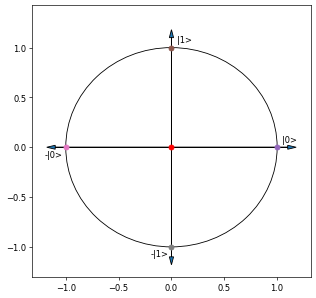

In [9]:
draw_qubit()

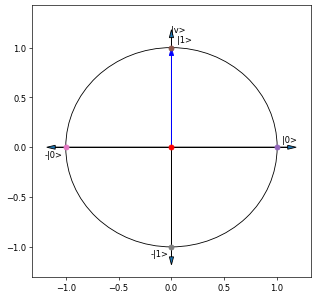

In [11]:
draw_qubit()
draw_quantum_state(0, 1, '|v>')

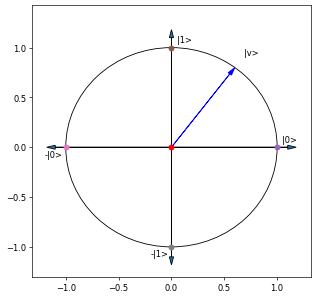

In [14]:
draw_qubit()
draw_quantum_state(3/5, 4/5, '|v>')

[0.7071067811865476, 0.7071067811865475]


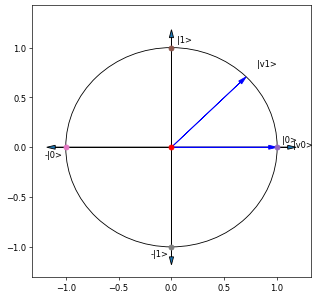

In [55]:
qc = QuantumCircuit(1)
qc.h(0)
#qc.h(0)
#qc.draw(output='mpl')
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
state_real = [state[i].real for i in range(len(state))]
print(state_real)
draw_qubit()
draw_quantum_state(1, 0, '|v0>')
draw_quantum_state(state_real[0], state_real[1], '|v1>')

In [43]:
from qiskit import execute

In [59]:
qc = QuantumCircuit(1)
qc.h(0)
#qc.h(0)
qc.measure_all()

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts()
counts

{'1': 46, '0': 54}

In [60]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

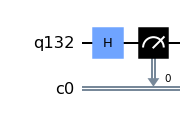

In [65]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(0)

qc.measure(q, c)

qc.draw(output='mpl')

In [66]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts()
counts

{'1': 53, '0': 47}

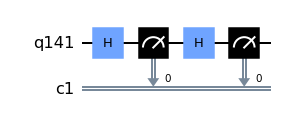

In [67]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(0)

qc.measure(q, c)

qc.h(0)

qc.measure(q, c)

qc.draw(output='mpl')

In [68]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts()
counts

{'0': 49, '1': 51}

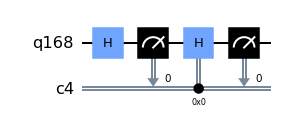

In [73]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(0)

qc.measure(q, c)

qc.h(0).c_if(c, 0)

qc.measure(q, c)

qc.draw(output='mpl')

In [74]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts()
counts

{'0': 26, '1': 74}

In [77]:
from qiskit.visualization import plot_histogram

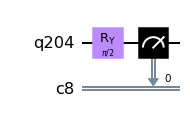

In [88]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

rotation_angle = pi/4 #2*pi/3

qc.ry(2*rotation_angle, q[0])

qc.measure(q, c)

qc.draw(output='mpl')

{'1': 502, '0': 498}


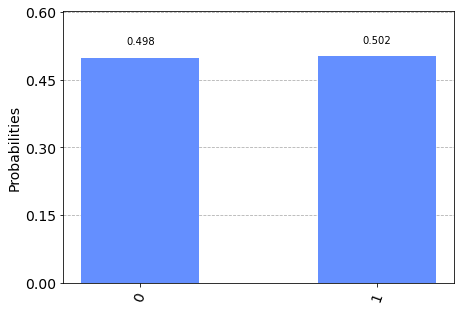

In [89]:
nbr_shots = 1000
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=nbr_shots)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

In [90]:
quantum_state = np.array([np.cos(rotation_angle), np.sin(rotation_angle)])
print('qs is', quantum_state)

qs is [0.70710678 0.70710678]


In [91]:
expected_nbr_zeros = nbr_shots*np.cos(rotation_angle)**2
expected_nbr_ones = nbr_shots*np.sin(rotation_angle)**2

print('expected 0', expected_nbr_zeros)
print('expected 1', expected_nbr_ones)

expected 0 500.0000000000001
expected 1 499.9999999999999
